## Project - Star Wars Survey

Before the release of Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: 
- Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?
- Who is the most favourable and unfavourable character?

To answer their question, they conducted an survey and received the reply from more than 1100 respondents. 
<br>In the survey, the respondents answered the followings:
- Demograpgic information such as gender, age, location
- Preference detail such as how much they like for different episodes and characters 

## Import the data 

In [1]:
import pandas as pd
import numpy as np 

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1", header=[0,1])
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28_level_0,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÅÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
,Unnamed: 0_level_1,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The data is by default with multilevel column names. The level 0 header states the question and the level 1 header states the additional inforamtion such as episodes' names and charachters' name. 
<br>
<br>
Since we need both of the information, we can merge the information from both columns and flatten the index.

In [2]:
header = []

for x in range(0,len(star_wars.columns)):
    value_0 = star_wars.columns.get_level_values(0)[x]
    value_1 = star_wars.columns.get_level_values(1)[x]    
    
    if (x <=2) or (28 <x <len(star_wars.columns)) :
        header.append(value_0)
    if 2 < x < 9 :
        header.append(f"Seen_{value_1}")
    if x >=9 and x<= 28:
        header.append(f"Rating_{value_1}")

star_wars.columns = star_wars.columns.to_flat_index()
star_wars.columns = header

In [3]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Seen_Star Wars: Episode I The Phantom Menace,Seen_Star Wars: Episode II Attack of the Clones,Seen_Star Wars: Episode III Revenge of the Sith,Seen_Star Wars: Episode IV A New Hope,Seen_Star Wars: Episode V The Empire Strikes Back,Seen_Star Wars: Episode VI Return of the Jedi,Rating_Star Wars: Episode I The Phantom Menace,...,Rating_Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÅÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The updated columns are as follows:

In [4]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 38 columns):
RespondentID                                                             1186 non-null int64
Have you seen any of the 6 films in the Star Wars franchise?             1186 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?    836 non-null object
Seen_Star Wars: Episode I  The Phantom Menace                            673 non-null object
Seen_Star Wars: Episode II  Attack of the Clones                         571 non-null object
Seen_Star Wars: Episode III  Revenge of the Sith                         550 non-null object
Seen_Star Wars: Episode IV  A New Hope                                   607 non-null object
Seen_Star Wars: Episode V The Empire Strikes Back                        758 non-null object
Seen_Star Wars: Episode VI Return of the Jedi                            738 non-null object
Rating_Star Wars: Episode I  The Phantom Menace        

## Clean the data 

There are couple of things that we need to change in the data for further analysis: 
- Convert the string columns which contains values True/False into boolean
- Convert ratings from string to float 

### Convert the string columns which contains values True/False into boolean

First the first 9 columns, all the columns are in string format except RespondentId. At the same time the values in all of these columns are True/False or Yes/No. 
<br>
<br>
They can be converted into boolean values which only the values True, False, and NaN. In general, Booleans are easier to work with because we can select the rows that are True or False without having to do a string comparison. Therefore we will convert the values in those columns: 

In [5]:
# Convert column 2 and 3 
yes_no = {
    "Yes": True,
    "No": False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [6]:
# Convert columns related to Seen_Star Wars
def true_false(ele):
    if ele is np.nan:
        return False
    else:
        return True
      
for i in range(3,9):    
    star_wars.iloc[:,i] = star_wars.iloc[:,i].apply(true_false)

For columns with Rating_Star Wars, the columns are already in the right type and therefore we can keep it as it is:
<br>
<br>
For columns with Rating_characters, it is originally in string format with the following values: 
- Very favorably
- Somewhat favorably
- Neither favorably nor unfavorably (neutral)
- Somewhat unfavorably
- Very unfavorably
- Unfamiliar (N/A)

We can convert those valuse into int value so as to calculate the favourite level in later stage.

In [7]:
rating = {
    "Very favorably": 5,
    "Somewhat favorably": 4,
    "Neither favorably nor unfavorably (neutral)": 3,
    "Somewhat unfavorably": 2,
    "Very unfavorably": 1,
    "Unfamiliar (N/A)": np.nan,
}

for col in star_wars.columns[15:29]:
    star_wars[col] = star_wars[col].map(rating)

Now the data is cleaned and we can start analyzing

In [8]:
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Seen_Star Wars: Episode I The Phantom Menace,Seen_Star Wars: Episode II Attack of the Clones,Seen_Star Wars: Episode III Revenge of the Sith,Seen_Star Wars: Episode IV A New Hope,Seen_Star Wars: Episode V The Empire Strikes Back,Seen_Star Wars: Episode VI Return of the Jedi,Rating_Star Wars: Episode I The Phantom Menace,...,Rating_Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÅÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,5.0,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,NaN,I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,5.0,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,4.0,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Initial Analysis - Respondents' demographic information

In [9]:
import matplotlib.pyplot as plt

# Respondents by genders
star_wars['Gender'].value_counts().plot(kind='bar');

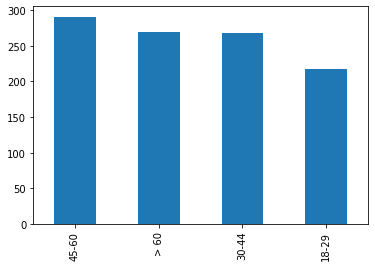

In [10]:
# Respondents by age groups
star_wars['Age'].value_counts().plot(kind='bar');

In [11]:
#Respondents by location
star_wars['Location (Census Region)'].value_counts()

East North Central    181
Pacific               175
South Atlantic        170
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Name: Location (Census Region), dtype: int64

From the result above, we know that the no.of female respondents are slightly more than the male respondents, and most of the respondents are in middle-ages or above. Besides, they are from different parts in US.

## Analysis - The degree of favourite in Star Wars episodes

In [12]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

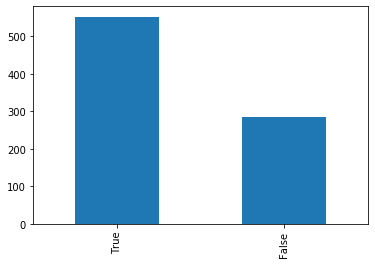

In [13]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts().plot(kind='bar');

Among more than 1100 respodents, more than 80% of them have watched at least 1 Star Wars episode and around 550 of them claimed that they are a fan for Star Wars. 

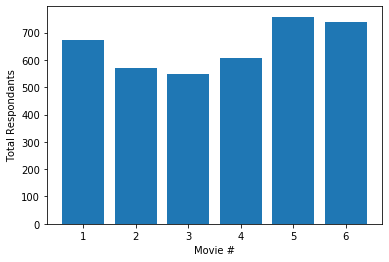

In [14]:
# Number of audiences for each episodes
sums = star_wars[star_wars.columns[3:9]].sum()
plt.bar(range(1,7), sums)
plt.xlabel("Movie #")
plt.ylabel('Total Respondants');

Text(0, 0.5, 'Average Ranking')

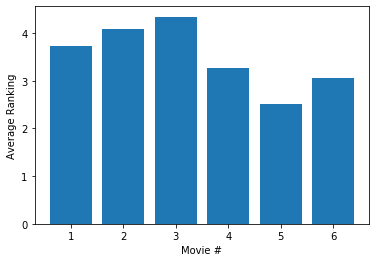

In [15]:
#Average ranking for each episodes
means = star_wars[star_wars.columns[9:15]].mean()
%matplotlib inline
plt.bar(range(1,7), means)
plt.xlabel("Movie #")
plt.ylabel('Average Ranking')

We can further break down the result by gender

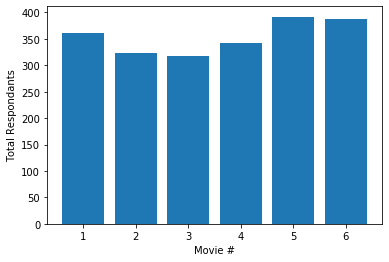

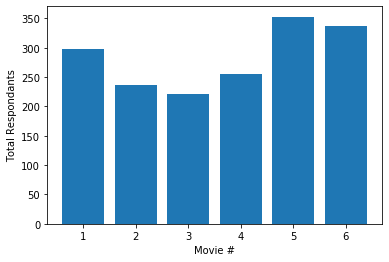

In [16]:
star_wars_males = males = star_wars[star_wars["Gender"] == "Male"]
star_wars_females = females = star_wars[star_wars["Gender"] == "Female"]


sums_males = star_wars_males[star_wars_males.columns[3:9]].sum()
plt.bar(range(1, 7), sums_males)
plt.xlabel("Movie #")
plt.ylabel('Total Respondants')
plt.show()

sums_females = star_wars_females[star_wars_females.columns[3:9]].sum()
plt.bar(range(1, 7), sums_females)
plt.xlabel("Movie #")
plt.ylabel('Total Respondants')
plt.show()

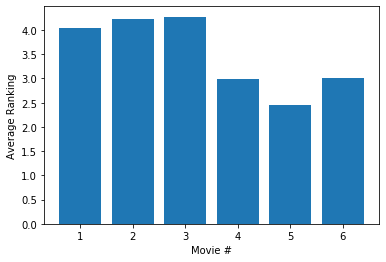

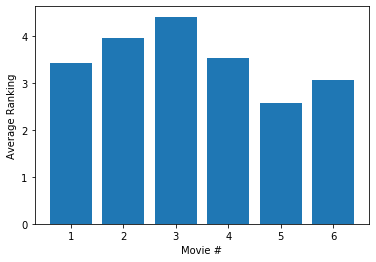

In [17]:
means_males = star_wars_males[star_wars_males.columns[9:15]].mean()
plt.bar(range(1,7), means_males)
plt.xlabel("Movie #")
plt.ylabel('Average Ranking')
plt.show()


means_females = star_wars_females[star_wars_females.columns[9:15]].mean()
plt.bar(range(1,7), means_females)
plt.xlabel("Movie #")
plt.ylabel('Average Ranking')
plt.show()

The ranking is in reverse. That means, the lower the score, the better the result.
<br>
<br>
The statistics about total audiences in each episode shows that after the episode 1, the number of audience in episode 2 and 3 decreased and the series started to regain the popularity in episode 4 and reached to the peak at episode 5. 
The statistics average rating also shows a similar trends. Audiences prefer the episode in later stage more than the previous. The trend is similar among both male and female respondents. At the same time, the episode 5 has the best ranking.  
<br>
<br>
Hence, from the findings above, we can conclude that the episode 5 -  “The Empire Strikes Back” is the best of the bunch

## Analysis - The degree of favourite in Star Wars characters

It would also be interesting to know the popularity of characters. The detail are as follows: 

In [18]:
# Most favourable characters
star_wars.iloc[:, 15:29].mean().sort_values(ascending=False).head(5)

Rating_Han Solo          4.671990
Rating_Obi Wan Kenobi    4.632426
Rating_Yoda              4.629902
Rating_Luke Skywalker    4.580606
Rating_R2 D2             4.569512
dtype: float64

In [19]:
# Most unfavourable characters
star_wars.iloc[:, 15:29].mean().sort_values(ascending=True).head(5)

Rating_Jar Jar Binks        2.780899
Rating_Emperor Palpatine    3.071429
Rating_Boba Fett            3.357353
Rating_Darth Vader          3.479167
Rating_Padme Amidala        3.604615
dtype: float64

And for those unfavourable characters, since their mean score is close to the median, it would be interesting to know if the audiences have a strong feeling towrds them (extremely like or extremely hate) or most of them have the neutral feeling. 
<br>
<br>
To see the trend, we can use compute the standard deviation for the mean score of those characters:

In [20]:
unfav_character = star_wars.iloc[:, 15:29].mean().sort_values(ascending=True).head(5).index
unfav_character

for x in unfav_character:
    print (f"{x}:{star_wars[x].std()}")

Rating_Jar Jar Binks:1.433877938298674
Rating_Emperor Palpatine:1.3193576092093016
Rating_Boba Fett:1.1475550209930498
Rating_Darth Vader:1.5355284589553408
Rating_Padme Amidala:1.118127805847704


From the statistic above, we can see that the most favourable characters are Han Solo, Obi Wan Kenobi and Yoda. On the other hand, Jar Jar Binks, Emperor Palpatine and Boba Fett are the least favourable characters. 
<br>
<br>
And one interesting fact is, the standard deviation of the mean score of the most unfavourable characters are relativly high when compare to the mean score, that means the rating for them are extreme: Some respondents love them so much and some hate them a lot. 